In [1]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN Mixed dnn version. The header is from one version, but we link with a different version (5110, 6021))


# Purpose

Just testing my intuition w.r.t. degrees of freedom in the students T distribution.

- Cauchy: df = 1.
- Normal: df = infinity (or at least some really high number)

This should be reflected when using PyMC3.

In [19]:
normal = np.random.normal(size=20000)
cauchy = np.random.standard_cauchy(size=20000)

In [20]:
with pm.Model() as normal_model:    
    mu = pm.Normal('mu', mu=0, sd=100)
    sd = pm.HalfNormal('sd', sd=100)
    nu = pm.Exponential('nu', lam=0.5)
    like = pm.StudentT('like', mu=mu, sd=sd, nu=nu, observed=normal)
    
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 2489/2500 [00:16<00:00, 152.34it/s]/home/ericmjl/anaconda/envs/bayesian/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.883254243865, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 2500/2500 [00:16<00:00, 152.58it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90f5f86a20>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f90f61ce668>]], dtype=object)

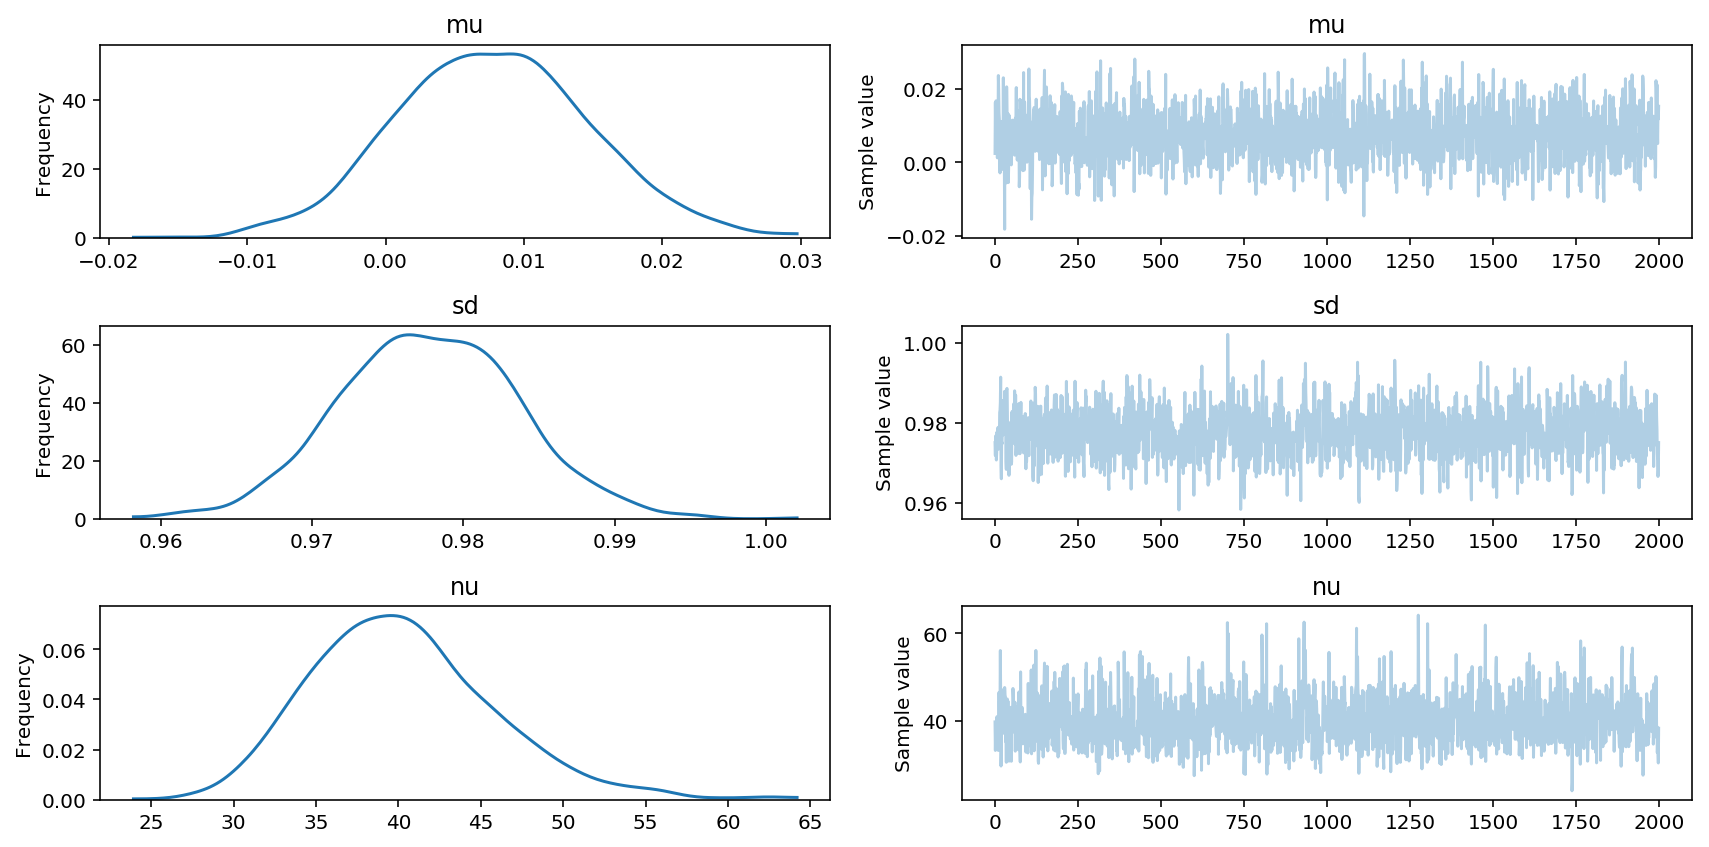

In [21]:
pm.traceplot(trace)

Many degrees of freedom for normal distribution. Makes sense.

In [22]:
with pm.Model() as cauchy_model:    
    mu = pm.Normal('mu', mu=0, sd=100)
    sd = pm.HalfNormal('sd', sd=100)
    nu = pm.Exponential('nu', lam=1)
    like = pm.StudentT('like', mu=mu, sd=sd, nu=nu, observed=cauchy)
    
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:12<00:00, 196.08it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f90f6928278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f9104a17128>]], dtype=object)

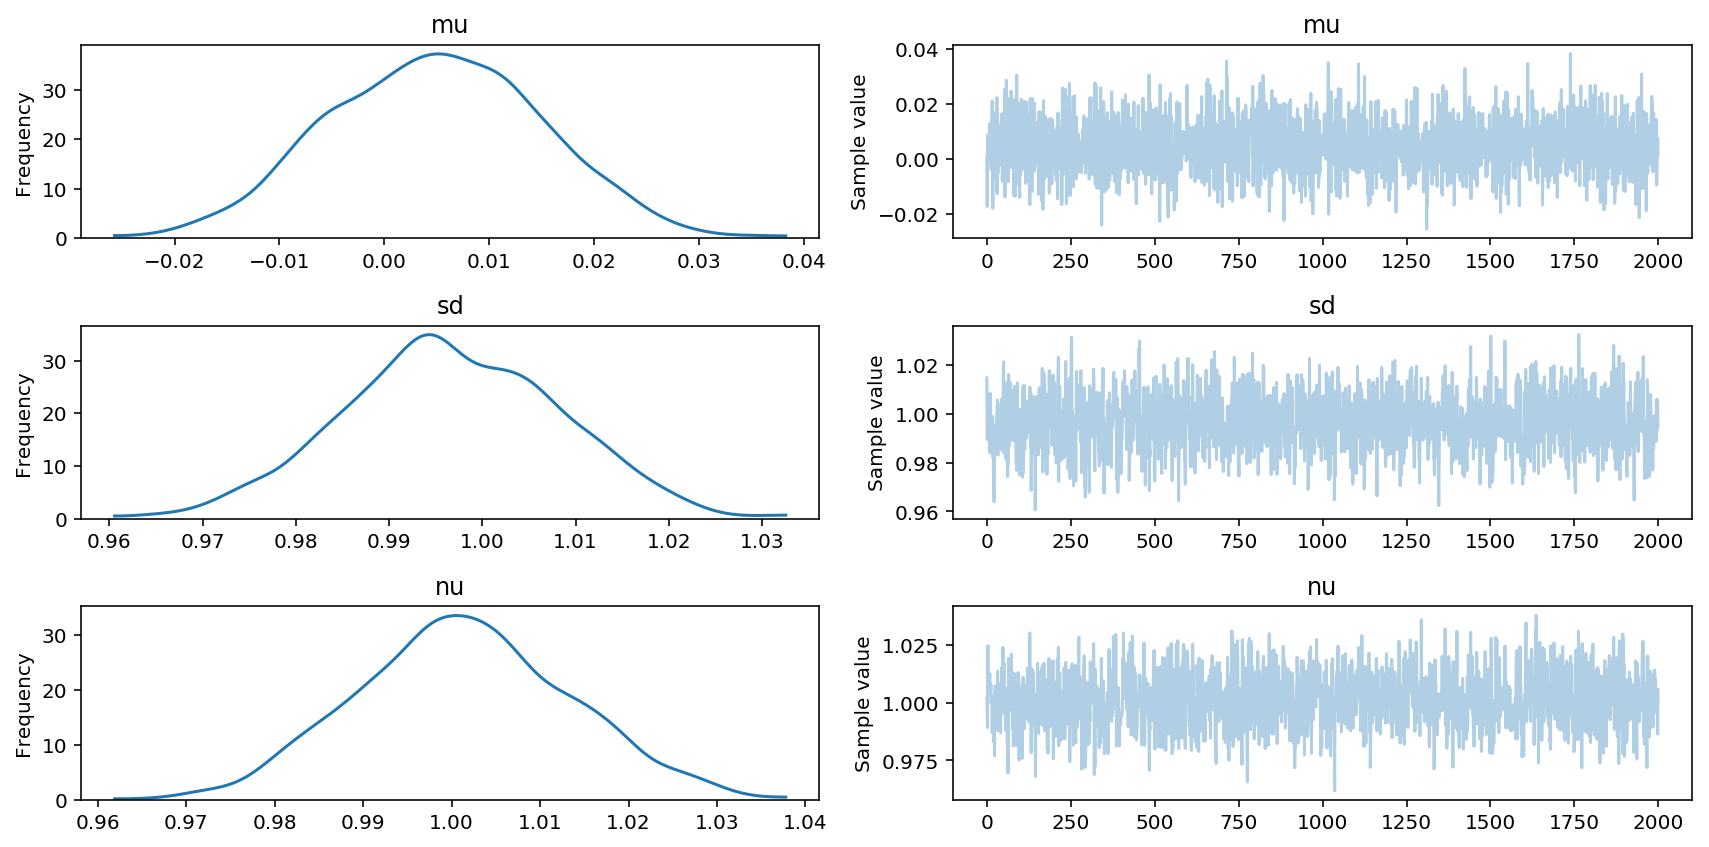

In [23]:
pm.traceplot(trace)

Yes :)